In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
movies = pd.read_csv('data/movies.csv')
ratings = pd.read_csv('data/ratings.csv')
links = pd.read_csv('data/links.csv')
tags = pd.read_csv('data/tags.csv')

In [8]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movies.shape

(9742, 3)

In [10]:
ratings.shape

(100836, 4)

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
ratings.userId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [40]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
# Group by movieId and count the number of ratings
ratings_count = ratings.groupby('movieId').size()

# Find the movieId with the maximum number of ratings
max_rated_movie_id = ratings_count.idxmax()

# Merge with movies DataFrame to get the title of the movie
max_rated_movie = movies[movies['movieId'] == max_rated_movie_id]

# Print the movie title with the maximum number of ratings
print(max_rated_movie[['title']])

                   title
314  Forrest Gump (1994)


In [17]:
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

# Print the tags for "Toy Story (1995)"
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags[['tag']])

Tags for 'Matrix, The (1999)':
                     tag
815         martial arts
816               sci-fi
1646  alternate universe
2794          philosophy
2795    post apocalyptic


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [19]:
merged_data = pd.merge(ratings, movies, on='movieId')

terminator_rating = merged_data[merged_data['title']== 'Terminator 2: Judgment Day (1991)']

average_rating = terminator_rating['rating'].mean()

print(average_rating)

3.970982142857143


How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

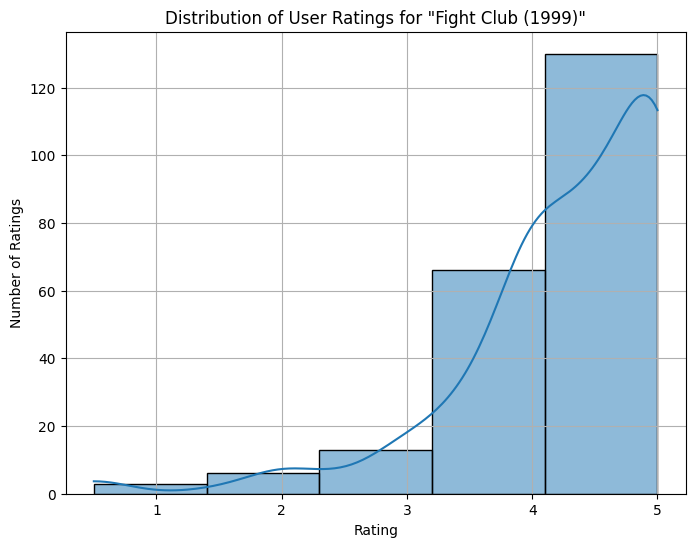

In [20]:
fight_club_rating = merged_data[merged_data['title']=='Fight Club (1999)']

plt.figure(figsize=(8,6))
sns.histplot(fight_club_rating['rating'], bins=5,kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True)
plt.show()

Which movie is the most popular based on  average user ratings?

In [31]:
rating_summary = ratings.groupby('movieId').agg(
    count=('rating','size'),
    mean_rating=('rating','mean')
    ).reset_index()

new_merged_data = pd.merge(movies,rating_summary,on='movieId')

filtered_data = new_merged_data[new_merged_data['count'] > 50]

most_popular_movie = filtered_data.loc[filtered_data['mean_rating'].idxmax()]
print(most_popular_movie)


movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
count                                       317
mean_rating                            4.429022
Name: 277, dtype: object


Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [33]:
sorted_data = filtered_data.sort_values(by='count', ascending=False)

top_5_movies = sorted_data.head()

print(top_5_movies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [35]:
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)

third_most_popular_sci_fi = sorted_sci_fi_movies.iloc[2]
print(third_most_popular_sci_fi['title'])

Jurassic Park (1993)


Mention the movieId of the movie which has the highest IMDB rating

In [36]:
highest_imdb_id = links['imdbId'].max()

movie_with_highest_imdb = links[links['imdbId'] == highest_imdb_id]

print(movie_with_highest_imdb)

      movieId   imdbId    tmdbId
9740   193587  8391976  483455.0


Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [43]:
merged_data_movie_links = pd.merge(movies, links, on='movieId')

sci_fi_movies_list = merged_data_movie_links[merged_data_movie_links['genres'].str.contains('Sci-Fi')]

highest_imdb_id = sci_fi_movies_list['imdbId'].max()

movie_with_highest_imdb = sci_fi_movies_list[sci_fi_movies_list['imdbId'] == highest_imdb_id]

print(movie_with_highest_imdb)

      movieId                        title           genres   imdbId    tmdbId
9630   179053  2048: Nowhere to Run (2017)  Sci-Fi|Thriller  7387408  475759.0
